In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
472,2021-05-08,157688833
473,2021-05-09,158330372
474,2021-05-10,158952301
475,2021-05-11,159690774
476,2021-05-12,160450873


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


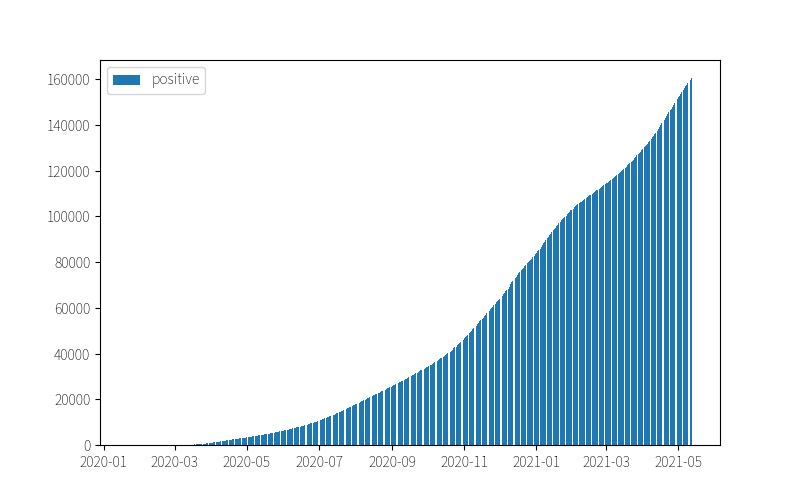

In [80]:
plt.figure(figsize=(8,5))
plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
plt.legend()

In [101]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [102]:
trans.head()

,date,count,move_ave7
0,2020-01-23,98.0,NaN
1,2020-01-24,286.0,NaN
2,2020-01-25,492.0,NaN
3,2020-01-26,685.0,NaN
4,2020-01-27,809.0,NaN


<IPython.core.display.Javascript object>


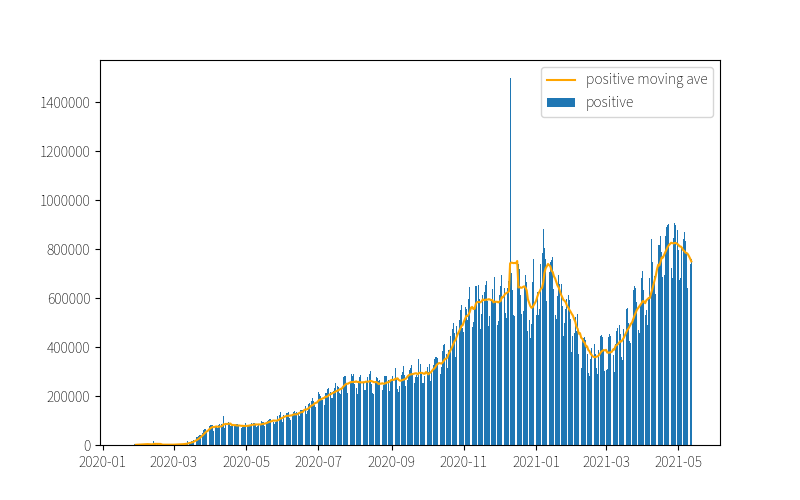

In [103]:
plt.figure(figsize=(8,5))
plt.bar(trans["date"],trans["count"],label="positive")
plt.plot_date(trans["date"],trans["move_ave7"],label="positive moving ave", fmt="-", color="orange")
plt.legend()

#### 